 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [52]:
# Initial imports
import pandas as pd
import numpy as np
import seaborn as sns
#import datetime as dt
from pathlib import Path

%matplotlib inline

fp_aapl = Path("Resources","aapl_historical.csv")
fp_algo = Path("Resources","algo_returns.csv")
fp_goog = Path("Resources","cost_historical.csv")
fp_cost = Path("Resources","goog_historical.csv")
fp_sp500 = Path("Resources","sp500_history.csv")
fp_whale = Path("Resources","whale_returns.csv")

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [53]:
# Reading whale returns; when using the read_csv Panda function we specify to take the dates from the 'Date' column and create a DateTimeIndex from them.  
whale_returns_df = pd.read_csv(fp_whale, index_col='Date', parse_dates=True)

whale_returns_df




,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [54]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [55]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [56]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(fp_algo, index_col='Date', parse_dates=True)
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [57]:
# Count nulls
algo_returns_df.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [58]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [59]:
# Reading S&P 500 Closing Prices; and changes the order of the datetimeindex to be from earliest to latest, important for daily returns calculation.
sp500_closing_df = pd.read_csv(fp_sp500, index_col='Date', parse_dates=True)
sp500_closing_df = sp500_closing_df.sort_index()
sp500_closing_df

C:\Users\16023\AppData\Local\Temp\ipykernel_14384\1220865670.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sp500_closing_df = pd.read_csv(fp_sp500, index_col='Date', parse_dates=True)


,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93
...,...
2019-04-16,$2907.06
2019-04-17,$2900.45
2019-04-18,$2905.03


In [60]:
# Check Data Types; using 'dtypes' function returns that column 'Close' is an "object" which means it either contains NaN, strings, or a mix of data types. 
sp500_closing_df.dtypes


Close    object
dtype: object

In [61]:
# Creates a variable that sees what unique data types are found in the 'Close' column

unique_data_types = {type(value) for value in sp500_closing_df['Close']}
unique_data_types



{str}

In [62]:
# Fix Data Types; chains .str.replace and .astype to replace the '$' symbol with an empty string and change the data type to float. 
sp500_closing_df['Close'] = sp500_closing_df['Close'].str.replace('$', '').astype(float)

In [63]:
# Makes sure the column 'Close' is the right data type.
sp500_closing_df.dtypes

Close    float64
dtype: object

In [64]:
# Calculate Daily Returns
sp500_daily_returns = sp500_closing_df['Close'].pct_change()
sp500_daily_returns


Date
2012-10-01         NaN
2012-10-02    0.000872
2012-10-03    0.003624
2012-10-04    0.007174
2012-10-05   -0.000322
                ...   
2019-04-16    0.000509
2019-04-17   -0.002274
2019-04-18    0.001579
2019-04-22    0.001012
2019-04-23    0.008841
Name: Close, Length: 1649, dtype: float64

In [65]:
# Drop nulls
sp500_daily_returns = sp500_daily_returns.dropna()

In [66]:
# Rename `Close` Column to be specific to this portfolio.
sp500_closing_df = sp500_closing_df.rename(columns={'Close': 'S&P 500 Close'})



## Combine Whale, Algorithmic, and S&P 500 Returns


In [67]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.


#combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_daily_returns], axis=1)
#combined_df = combined_df.rename(columns={'Close': 'S&P 500 Daily Returns'})
#combined_df = combined_df.dropna()

# Instead of repeatedly updating the variable 'combined_df', we can chain methods and/or use them within parameters of other methods. 

combined_df = pd.concat(
    [whale_returns_df, algo_returns_df, sp500_daily_returns.rename('S&P 500 Daily Returns')],
    axis=1
).dropna()


combined_df






,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: xlabel='Date'>

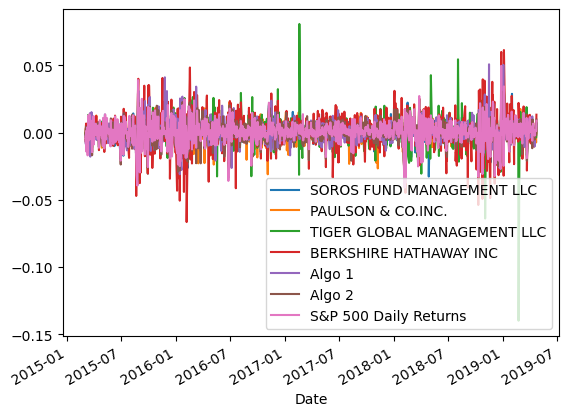

In [68]:
# Plot daily returns of all portfolios
combined_df.plot()


#### Calculate and Plot cumulative returns.

<Axes: xlabel='Date'>

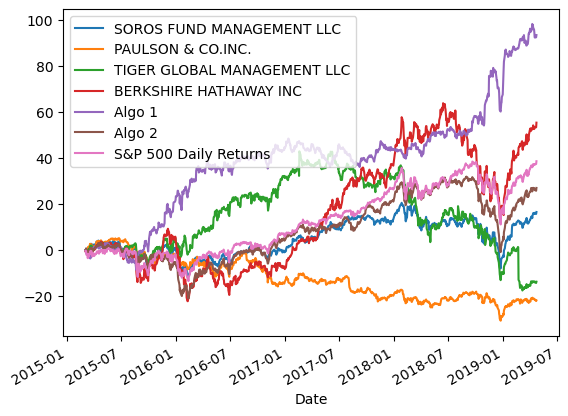

In [69]:
# Calculates the cumulative returns of all portfolios as a percentage of original investment.
combined_cumulative_returns = ((1+ combined_df).cumprod() -1)*100


# Plot cumulative returns
combined_cumulative_returns.plot()


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<Axes: >

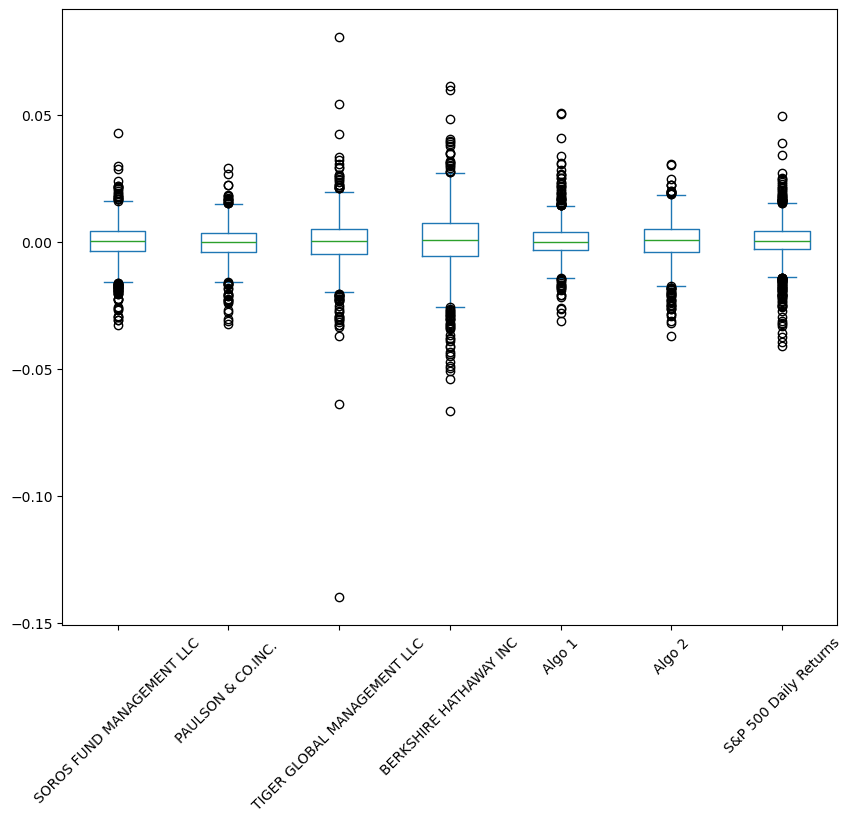

In [70]:
# Box plot to visually show risk
combined_df.plot.box(rot=45, figsize=(10, 8))

### Calculate Standard Deviations

In [71]:
# Calculate the daily standard deviations of all portfolios
combined_daily_std = combined_df.std()
combined_daily_std

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500 Daily Returns          0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [72]:
# Calculate  the daily standard deviation of S&P 500

# Determine which portfolios are riskier than the S&P 500
riskier_portfolios = combined_daily_std[combined_daily_std > combined_daily_std['S&P 500 Daily Returns']]

print("Portfolios riskier than the S&P 500:")
print(riskier_portfolios)

Portfolios riskier than the S&P 500:
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


### Calculate the Annualized Standard Deviation

In [73]:
# Calculate the annualized standard deviation (252 trading days)
combined_annualized_std = combined_df.std() * np.sqrt(252)

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: xlabel='Date'>

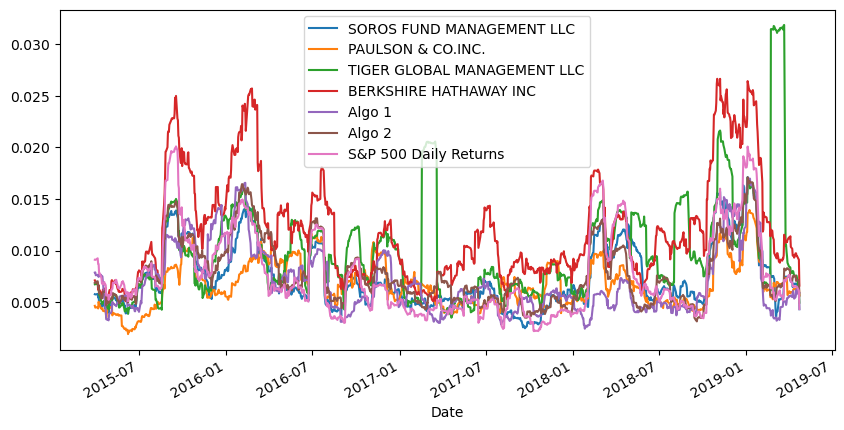

In [74]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21day = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std_21day.plot(figsize=(10,5))

### Calculate and plot the correlation

<Axes: >

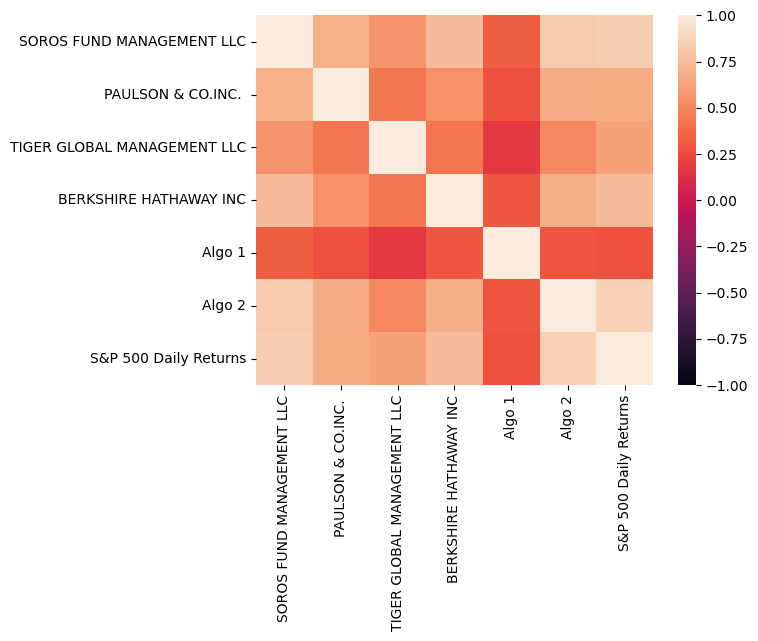

In [75]:
# Calculate the correlation
correlation = combined_df.corr()

# Display the correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<Axes: xlabel='Date'>

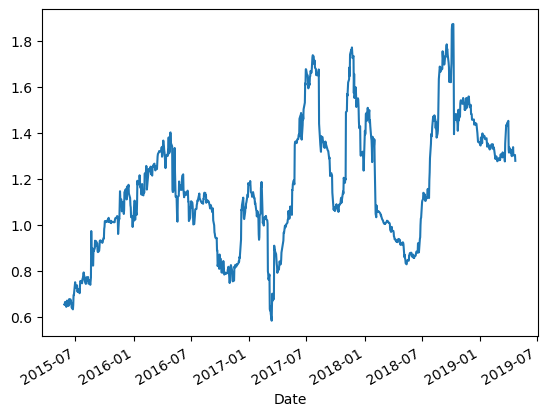

In [76]:
# Calculate 60-day rolling covariance and variance
rolling_covariance = combined_df['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(combined_df['S&P 500 Daily Returns'])
rolling_variance = combined_df['S&P 500 Daily Returns'].rolling(window=60).var()

# Calculate 60-day rolling beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [81]:
# Use `ewm` to calculate the rolling window
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [82]:
# Annualized Sharpe Ratios
combined_average_annual_returns = combined_df.mean() * 252

combined_sharpe_ratios = combined_average_annual_returns / combined_annualized_std
combined_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500 Daily Returns          0.648267
dtype: float64

<Axes: >

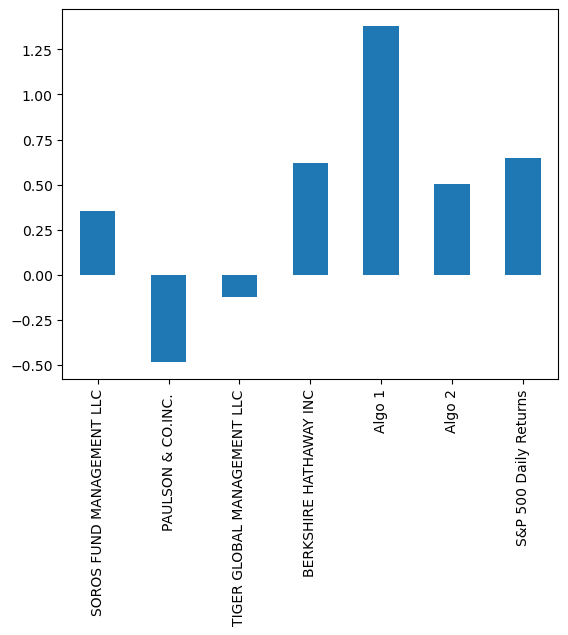

In [83]:
# Visualize the sharpe ratios as a bar plot
combined_sharpe_ratios.plot(kind='bar')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Both algorithmic strategies (Algo 1 and Algo 2) appear to outperform both the market (S&P 500) and the whale portfolios in terms of risk-adjusted returns.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [29]:
# Reading data from 1st stock
# We use 'aapl_closing_df = pd.read_csv(fp_aapl)' to see the column names from original csv so we can create the DataTimeIndex
aapl_closing_df = pd.read_csv(fp_aapl, index_col='Trade DATE', parse_dates=True)
aapl_closing_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [30]:
# Reading data from 2nd stock
goog_closing_df = pd.read_csv(fp_goog, index_col='Trade DATE', parse_dates=True)
goog_closing_df

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [31]:
# Reading data from 3rd stock
cost_closing_df = pd.read_csv(fp_cost, index_col='Trade DATE', parse_dates=True)

In [32]:
# Chain methods to combine all stocks in a single DataFrame and rename the new columns
portfolio_closing_df = pd.concat([aapl_closing_df['NOCP'], cost_closing_df['NOCP'], goog_closing_df['NOCP']], 
                                         axis=1, 
                                         keys=['AAPL Close', 'COST Close', 'GOOG Close'])

portfolio_closing_df


,AAPL Close,COST Close,GOOG Close
Trade DATE,,,
2019-05-09,200.72,1162.38,243.47
2019-05-08,202.90,1166.27,241.34
2019-05-07,202.86,1174.10,240.18
2019-05-06,208.48,1189.39,244.23
2019-05-03,211.75,1185.40,244.62
...,...,...,...
2018-05-17,186.99,1078.59,199.60
2018-05-16,188.18,1081.77,198.71
2018-05-15,186.44,1079.23,195.48


In [33]:
# Reset Date index
portfolio_closing_df = portfolio_closing_df.sort_index()
portfolio_closing_df

,AAPL Close,COST Close,GOOG Close
Trade DATE,,,
2018-05-11,188.59,1098.26,195.76
2018-05-14,188.15,1100.20,195.88
2018-05-15,186.44,1079.23,195.48
2018-05-16,188.18,1081.77,198.71
2018-05-17,186.99,1078.59,199.60
...,...,...,...
2019-05-03,211.75,1185.40,244.62
2019-05-06,208.48,1189.39,244.23
2019-05-07,202.86,1174.10,240.18


In [35]:
# Calculate daily returns and drop NAs
pfdaily_returns = portfolio_closing_df.pct_change().dropna()

# Display sample data
pfdaily_returns.head()

,AAPL Close,COST Close,GOOG Close
Trade DATE,,,
2018-05-14,-0.002333,0.001766,0.000613
2018-05-15,-0.009088,-0.019060,-0.002042
2018-05-16,0.009333,0.002354,0.016523
2018-05-17,-0.006324,-0.002940,0.004479
2018-05-18,-0.003637,-0.011339,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [36]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
custom_portfolio_returns = pfdaily_returns.dot(weights)
# Display sample data
custom_portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# Join your returns DataFrame to the original returns DataFrame 'combined_df'.
combined_df['Custom Portfolio'] = custom_portfolio_returns
combined_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns,Custom Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545


In [41]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
total_portfolio_returns_df = combined_df.dropna()
total_portfolio_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500 Daily Returns,Custom Portfolio
Date,,,,,,,,
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061
...,...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [42]:
# Calculate the annualized `std`
total_annualized_std = total_portfolio_returns_df.std() * np.sqrt(252)

### Calculate and plot rolling `std` with 21-day window

<Axes: xlabel='Date'>

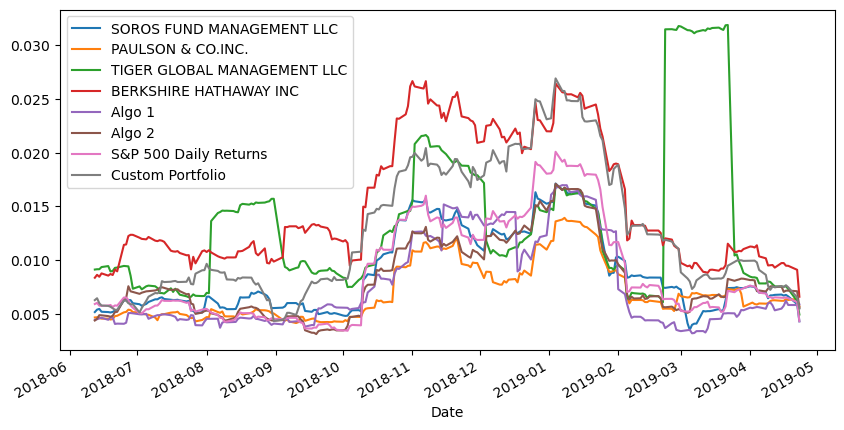

In [43]:
# Calculate rolling standard deviation
total_portfolio_returns_df.rolling(window=21).std().plot(figsize=(10,5))
# Plot rolling standard deviation


### Calculate and plot the correlation

<Axes: >

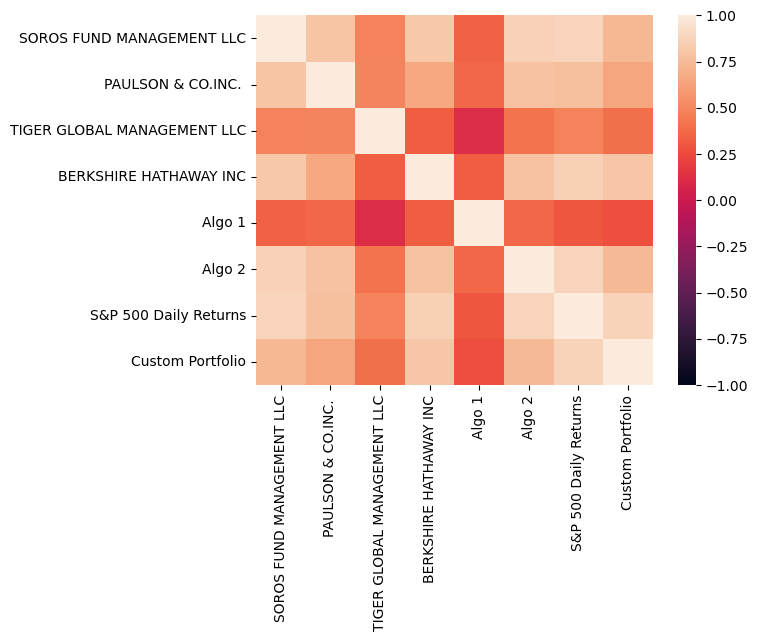

In [45]:
# Calculate and plot the correlation
correlation = total_portfolio_returns_df.corr()

# Display the correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<Axes: xlabel='Date'>

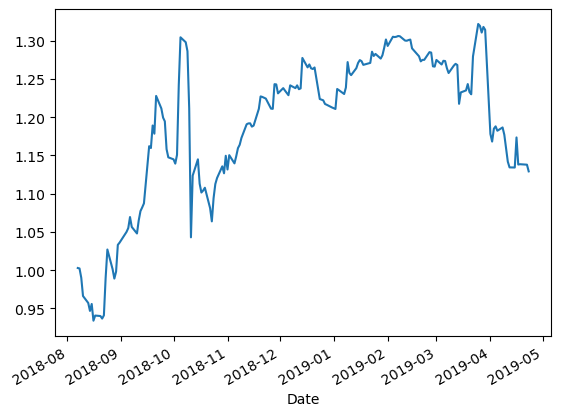

In [44]:
# Calculate and plot Beta
# Calculate 60-day rolling covariance and variance
rolling_covariance = total_portfolio_returns_df['Custom Portfolio'].rolling(window=60).cov(combined_df['S&P 500 Daily Returns'])
rolling_variance = total_portfolio_returns_df['S&P 500 Daily Returns'].rolling(window=60).var()

# Calculate 60-day rolling beta
rolling_beta = rolling_covariance / rolling_variance

# Plot beta trend
rolling_beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [47]:
# Calculate Annualized Sharpe Ratios

total_average_annual_returns = total_portfolio_returns_df.mean() * 252

total_sharpe_ratios = total_average_annual_returns / total_annualized_std
total_sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500 Daily Returns          0.584820
Custom Portfolio               0.933123
dtype: float64

<Axes: title={'center': 'Sharpe Ratios of Portfolios'}>

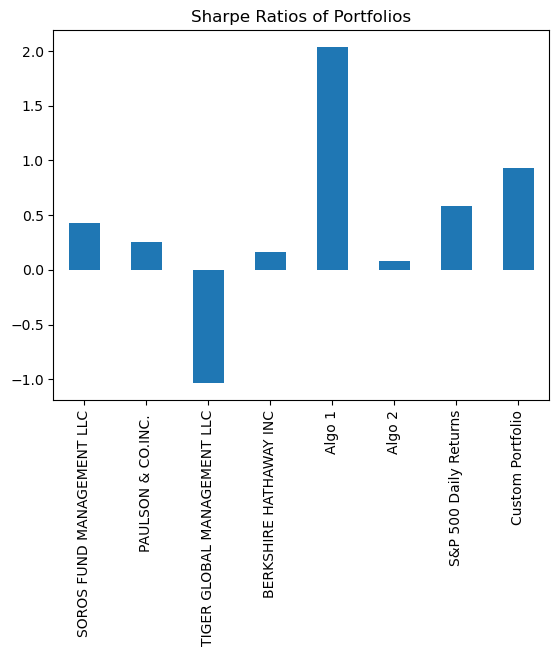

In [48]:
# Visualize the sharpe ratios as a bar plot
total_sharpe_ratios.plot(kind='bar', title='Sharpe Ratios of Portfolios')

### How does your portfolio do?

Write your answer here!

'Custom Portfolio' has a Sharpe Ratio of approximately 0.933123. This is one of the highest among the portfolios shown in the bar plot, indicating that the 'Custom Portfolio' has one of the best risk-adjusted performance compared to the other portfolios. This suggests that the 'Custom Portfolio' has been able to generate strong returns relative to the risk taken.
